<a href="https://colab.research.google.com/github/ncdxhuanghao/TensorFlow-Examples/blob/master/linear_regression_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial cost=0.198590577 W= 0.11790231 b= 1.2506583
Eporch: 0001 cost= 0.122704856 W= 0.14897586 b= 1.2544699
Eporch: 0100 cost= 0.087270781 W= 0.19397946 b= 1.2075527
Eporch: 0200 cost= 0.085040450 W= 0.20057353 b= 1.1608036
Eporch: 0300 cost= 0.083291113 W= 0.20641339 b= 1.1194018
Eporch: 0400 cost= 0.081919014 W= 0.21158542 b= 1.0827343
Eporch: 0500 cost= 0.080842815 W= 0.2161659 b= 1.0502607
Eporch: 0600 cost= 0.079998747 W= 0.22022252 b= 1.0215012
Eporch: 0700 cost= 0.079336688 W= 0.22381516 b= 0.996031
Eporch: 0800 cost= 0.078817405 W= 0.22699693 b= 0.9734736
Eporch: 0900 cost= 0.078410119 W= 0.22981477 b= 0.9534964
Eporch: 1000 cost= 0.078090645 W= 0.2323104 b= 0.9358036


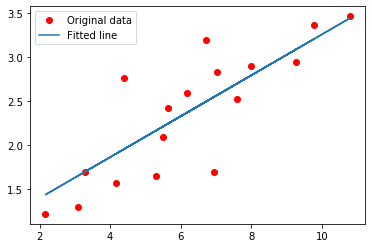

In [0]:
from __future__ import absolute_import,division,print_function
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf

#Set Eager API 
tf.enable_eager_execution()
tfe=tf.contrib.eager 
#Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples=len(train_X)
#Parameters
learning_rate=0.01
display_step=100
num_steps=1000
#Weight and Bias 
W=tfe.Variable(np.random.randn())
b=tfe.Variable(np.random.randn())

#Linear regression(Wx+b)
def linear_regression(inputs):
  return inputs*W+b
#Mean square error 
def mean_square_fn(model_fn,inputs,labels):
  return tf.reduce_sum(tf.pow(model_fn(inputs)-labels,2)) /(2*n_samples)

#SGD Optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
#Computer gradients 
grad = tfe.implicit_gradients(mean_square_fn)
#Initial cost,before optimizing
print("Initial cost={:.9f}".format(mean_square_fn(linear_regression,train_X,train_Y)),
      "W=",W.numpy(),"b=",b.numpy())
#Training 
for step in range(num_steps):
  optimizer.apply_gradients(grad(linear_regression,train_X,train_Y))
  if(step+1)%display_step ==0 or step==0:
    print("Eporch:",'%04d'%(step+1),
          "cost=","{:.9f}".format(mean_square_fn(linear_regression,train_X,train_Y)),
          "W=",W.numpy(),"b=",b.numpy())

#Graphic display
plt.plot(train_X,train_Y,'ro',label='Original data')
plt.plot(train_X,np.array(W*train_X+b),label='Fitted line')
plt.legend()
plt.show()    
